# Introduction to Scikit-Learn

Scikit-Learn is a well known package that provides access to many common machine learning algorithms through a consistent, well-organized Application Programming Interface (API) and is supported by very thorough and comprehensive documentation.

The uniform syntax and the consistency in how the API is designed means that once you learn one model, it is surprisingly easy to pick up additional models.

## Lets take an example to familiarise with scikit

To prepare our appetite for what's to come, we will take a quick look at coffee prices near the North Shore of Oahu, Hawaii. Our goal will be to predict the price of a cup of coffee, given a cup size.

These prices come from several coffee shops in the area, in 2019.

|Size (oz)|Price ($)|
|----|----|
|12|2.95|
|16|3.65|
|20|4.15|
|14|3.25|
|18|4.20|
|20|4.00|


### Prep the data

Let's look at the data in a simple scatter plot to compare the cost of coffee versus the size of the cup.

We start with a set of standard imports...

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# NOTE: during the Choose the Model step, we will import the 
#     model we want, but there is no reason you can't import it here.
# from sklearn.linear_model import LinearRegression

### Prep the training and test data

**The training data**:

We start off by making two `numpy` arrays.

In [12]:
x_train = np.array([12, 16, 20, 14, 18, 20])               # Coffee cup sizes
y_train = np.array([2.95, 3.65, 4.15, 3.25, 4.20, 4.00])   # Coffee prices

Then we plot them using a `matplotlib` scatter plot.

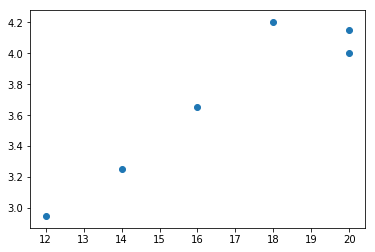

In [13]:
plt.scatter(x_train, y_train);

In order to put this data into a linear regression machine learning algorithm, we need to create our features matrix, which includes just our coffee sizes (`x_train` values).

In this case, we will use one of the `numpy` techniques to increase the dimensionality of the `x_train` array. We will discuss this process in greater detail in a few minutes.
```
X_train = x_train[:, np.newaxis]
```

We will call our training set: `X_train` (with an upper case `X`).

In [14]:
x_train.shape

(6,)

In [15]:
X_train = x_train.reshape(6,1)       # creates an array of arrays
X_train.shape

(6, 1)

Our target values are generally labeled `y_train` (with a lower case `y`) and these values can be a simple array.

In [16]:
y_train

array([2.95, 3.65, 4.15, 3.25, 4.2 , 4.  ])

**Now, the test data**:

We need to have some test data to see what values the model will predict. Let's presume that some friends will be coming to the North Shore of Oahu and want to buy some coffee in various sizes, include some potentially unusual sizes.

Based on their requests, we prep several cup sizes to see what price the model will predict.

We generate a set of `x_test` values (representing size in oz.) in an array. Then we convert the array to a 2D matrix for inclusion as an argument when we get to the prediction phase. As noted above, we will discuss this in detail shortly.

In [17]:
x_test = np.array([16, 15, 12, 20, 17])

In [18]:
X_test = x_test[:, None]      # None will accomplish the same
X_test                        # outcome as np.newaxis

array([[16],
       [15],
       [12],
       [20],
       [17]])

### Choose the Model

For this quick example, we are gonna import a simple **linear regression** model from the sklearn collection of linear models.

In [19]:
from sklearn.linear_model import LinearRegression

### Choose Appropriate Hyperparameters

This model comes, as do most of the models in sklearn with arguments (or hyperparameters) set to sane defaults, so for this case, we won't add or change any arguments.

**NOTE**: When Jupyter evaluates a model, it displays a string representation of that model with the current settings for the model, including any defaults.

In [20]:
model = LinearRegression()
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

### Fit the model

With a prepared model, we need to feed it data to evaluate. For this linear regression model, we give it two arguments: `X` and `y`.

In [21]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

With these inputs, the model was able to calculate the **slope** (coefficient) and the **y-intercept** of the line that aligns most closely with our training data.

Let's look at both of these calculated results.

```python
model.coef_
model.intercept_
```

**NOTE**: scikit-learn appends an `_` to the end of attributes that return **calculated** values. It does this to help distinguish between inputs and outputs

In [22]:
model.coef_

array([0.148125])

In [23]:
model.intercept_

1.2312499999999993

### Apply the model

In [24]:
y_pred = model.predict(X_test)
y_pred

# reminder, these were the test cup sizes: 
# [16, 15, 12, 20, 17]

array([3.60125 , 3.453125, 3.00875 , 4.19375 , 3.749375])

### Examine the Results

From here, we can plot all of the data points together on one chart:

* original values in purple
* predicted values in red
* predicted slope of the line that best fits the original training data

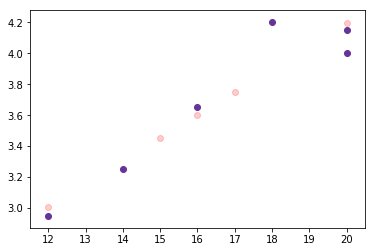

In [25]:
plt.scatter(x_train, y_train, color='rebeccapurple')
plt.scatter(x_test, y_pred, color='red', alpha=0.20)

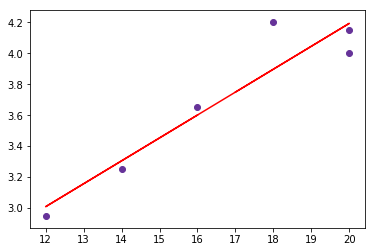

In [26]:
plt.scatter(x_train, y_train, color='rebeccapurple')
plt.plot(x_test, y_pred, color='red');